In [1]:
import tensorflow as tf
import os
import cv2
import imghdr

/var/folders/tn/5v72xj717sbgbxty8npt2m3m0000gn/T/ipykernel_3199/1916308919.py:4: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [2]:
data_dir = 'data' 

In [3]:
os.listdir(os.path.join(data_dir, 'happy'))

['images241.jpg',
 '05-12-21-happy-people.jpg',
 '110754-utyeqqosky-1547658396.jpeg',
 'Happy.jpg',
 'if-you-recognize-these-signs-youre-a-naturally-happy-person.png',
 'GettyImages-871518740-1024x707.jpg',
 'images136.jpg',
 '7-principles-of-successful-and-happy-people.png',
 'how-happy-are-healthy-people.jpg',
 '170404-happy-workers-feature.jpg',
 'images240.jpg',
 'image18.jpeg',
 'MV5BMTM3ODM0NTQ1MF5BMl5BanBnXkFtZTcwMzAxMTM5OA._V1_.jpg',
 'images31.jpg',
 'goup-happy-people-group-jumping-isolated-white-background-35582232.jpg',
 'images134.jpg',
 'images135.jpg',
 'images18.jpg',
 'young-and-happy-people-vector-15114154.jpg',
 'file-20230208-27-3jttof.jpg',
 'Happiness-Habits-10-Things-Happy-People-Do-Before-Bed-800x450.jpg',
 'images131.jpg',
 'habits-of-happy-people-jpg.jpg',
 'images118.jpg',
 'friends_190412.jpg',
 'images252.jpg',
 'images21.jpg',
 'images250.jpg',
 'compassion.jpg',
 'getty_107808334_121413.jpg',
 '1920px-face-smile.svg_.png',
 'gdfVVm_MyCRtqpvdkt8vtSB1n_oz_C

In [4]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [6]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

libpng warning: iCCP: known incorrect sRGB profile


# Load Data

In [7]:
import numpy as np
from matplotlib import pyplot as plt

In [8]:
data = tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [9]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 251 files belonging to 2 classes.


In [10]:
data_iterator = data.as_numpy_iterator()

In [11]:
batch = data_iterator.next()

2024-02-20 11:46:32.161720: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


In [12]:
batch[0].shape

(32, 256, 256, 3)

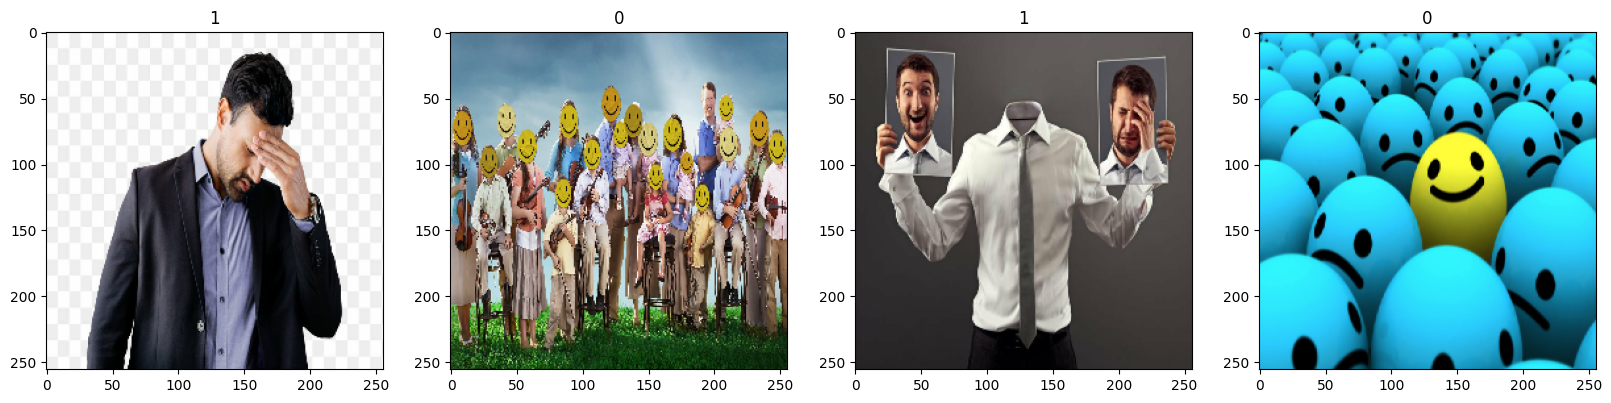

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Class 1 = SAD

Class 0 = HAPPY

In [14]:
data = data.map(lambda x,y: (x/255, y))

In [15]:
data.as_numpy_iterator().next()

2024-02-20 11:46:39.789657: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


(array([[[[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

In [16]:
len(data)

8

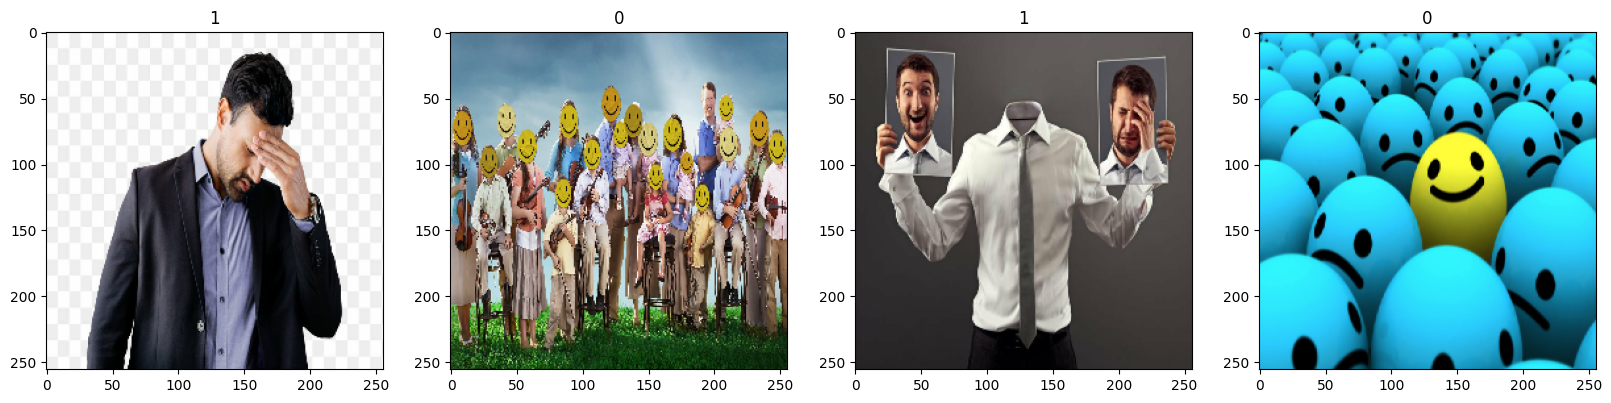

In [17]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [23]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [24]:
train_size + val_size + test_size

8

In [25]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Build Deep Learning Model

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [27]:
model = Sequential()

In [28]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [29]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# Logs

In [31]:
logdir='logs'

In [32]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [33]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


2024-02-20 12:21:48.209200: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 1.2202 - accuracy: 0.4875

2024-02-20 12:21:50.957428: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 4s 565ms/step - loss: 1.2202 - accuracy: 0.4875 - val_loss: 0.5840 - val_accuracy: 0.7500
Epoch 2/20


2024-02-20 12:21:51.823027: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 0.5422 - accuracy: 0.7312

2024-02-20 12:21:53.960196: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 3s 464ms/step - loss: 0.5422 - accuracy: 0.7312 - val_loss: 0.5428 - val_accuracy: 0.6875
Epoch 3/20


2024-02-20 12:21:54.753221: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 0.5402 - accuracy: 0.7125

2024-02-20 12:21:56.790952: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 3s 465ms/step - loss: 0.5402 - accuracy: 0.7125 - val_loss: 0.5219 - val_accuracy: 0.6875
Epoch 4/20


2024-02-20 12:21:57.697014: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 0.4991 - accuracy: 0.7125

2024-02-20 12:22:00.012930: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 3s 508ms/step - loss: 0.4991 - accuracy: 0.7125 - val_loss: 0.4635 - val_accuracy: 0.8125
Epoch 5/20


2024-02-20 12:22:00.935693: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 0.4093 - accuracy: 0.8000

2024-02-20 12:22:03.035036: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 3s 465ms/step - loss: 0.4093 - accuracy: 0.8000 - val_loss: 0.4388 - val_accuracy: 0.7500
Epoch 6/20


2024-02-20 12:22:03.824760: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 0.3942 - accuracy: 0.8188

2024-02-20 12:22:05.845423: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 3s 454ms/step - loss: 0.3942 - accuracy: 0.8188 - val_loss: 0.4138 - val_accuracy: 0.7500
Epoch 7/20


2024-02-20 12:22:06.625471: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 0.3600 - accuracy: 0.8125

2024-02-20 12:22:08.633527: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 3s 480ms/step - loss: 0.3600 - accuracy: 0.8125 - val_loss: 0.3838 - val_accuracy: 0.9219
Epoch 8/20


2024-02-20 12:22:09.521890: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 0.2919 - accuracy: 0.9250

2024-02-20 12:22:11.474265: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 3s 439ms/step - loss: 0.2919 - accuracy: 0.9250 - val_loss: 0.4332 - val_accuracy: 0.8281
Epoch 9/20


2024-02-20 12:22:12.245644: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 0.3001 - accuracy: 0.8938

2024-02-20 12:22:14.148384: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 3s 438ms/step - loss: 0.3001 - accuracy: 0.8938 - val_loss: 0.2909 - val_accuracy: 0.9375
Epoch 10/20


2024-02-20 12:22:14.962912: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 0.2478 - accuracy: 0.9125

2024-02-20 12:22:16.896888: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 3s 443ms/step - loss: 0.2478 - accuracy: 0.9125 - val_loss: 0.2335 - val_accuracy: 0.9531
Epoch 11/20


2024-02-20 12:22:17.683246: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 0.2011 - accuracy: 0.9563

2024-02-20 12:22:19.880331: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 3s 519ms/step - loss: 0.2011 - accuracy: 0.9563 - val_loss: 0.1692 - val_accuracy: 0.9844
Epoch 12/20


2024-02-20 12:22:20.906014: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 0.1321 - accuracy: 0.9688

2024-02-20 12:22:23.023472: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 3s 444ms/step - loss: 0.1321 - accuracy: 0.9688 - val_loss: 0.1119 - val_accuracy: 0.9531
Epoch 13/20


2024-02-20 12:22:23.822649: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 0.0795 - accuracy: 0.9750

2024-02-20 12:22:25.826185: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 3s 456ms/step - loss: 0.0795 - accuracy: 0.9750 - val_loss: 0.0465 - val_accuracy: 1.0000
Epoch 14/20


2024-02-20 12:22:26.604044: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 0.0966 - accuracy: 0.9438

2024-02-20 12:22:28.660365: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 3s 469ms/step - loss: 0.0966 - accuracy: 0.9438 - val_loss: 0.0640 - val_accuracy: 1.0000
Epoch 15/20


2024-02-20 12:22:29.461085: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 0.0946 - accuracy: 0.9875

2024-02-20 12:22:32.066214: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 3s 592ms/step - loss: 0.0946 - accuracy: 0.9875 - val_loss: 0.0656 - val_accuracy: 0.9844
Epoch 16/20


2024-02-20 12:22:32.913841: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 0.0823 - accuracy: 0.9812

2024-02-20 12:22:35.007056: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 3s 480ms/step - loss: 0.0823 - accuracy: 0.9812 - val_loss: 0.0515 - val_accuracy: 0.9844
Epoch 17/20


2024-02-20 12:22:35.843434: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 0.0468 - accuracy: 1.0000

2024-02-20 12:22:38.138264: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 3s 519ms/step - loss: 0.0468 - accuracy: 1.0000 - val_loss: 0.0486 - val_accuracy: 0.9688
Epoch 18/20


2024-02-20 12:22:39.023588: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 0.0373 - accuracy: 0.9812

2024-02-20 12:22:41.189419: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 3s 508ms/step - loss: 0.0373 - accuracy: 0.9812 - val_loss: 0.0190 - val_accuracy: 1.0000
Epoch 19/20


2024-02-20 12:22:42.133485: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 0.0238 - accuracy: 1.0000

2024-02-20 12:22:44.292229: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 3s 475ms/step - loss: 0.0238 - accuracy: 1.0000 - val_loss: 0.0113 - val_accuracy: 1.0000
Epoch 20/20


2024-02-20 12:22:45.102582: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - ETA: 0s - loss: 0.0162 - accuracy: 1.0000

2024-02-20 12:22:47.141492: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 3s 458ms/step - loss: 0.0162 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 1.0000


# Plot Performance

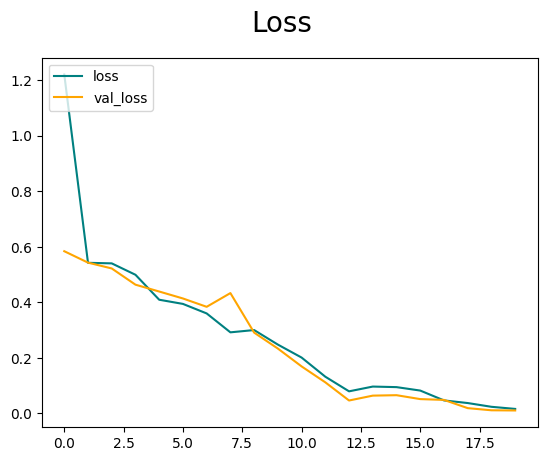

In [34]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

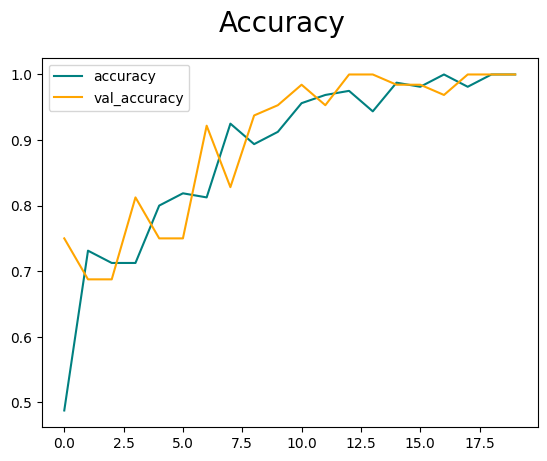

In [35]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate

In [36]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [37]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [38]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

2024-02-20 12:41:50.566786: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/1 [==============================] - 0s 251ms/step


In [40]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


# Test

In [41]:
import cv2

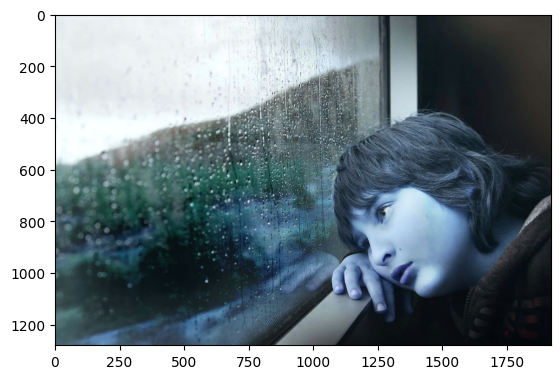

In [62]:
img = cv2.imread('sad1.jpg')
plt.imshow(img)
plt.show()

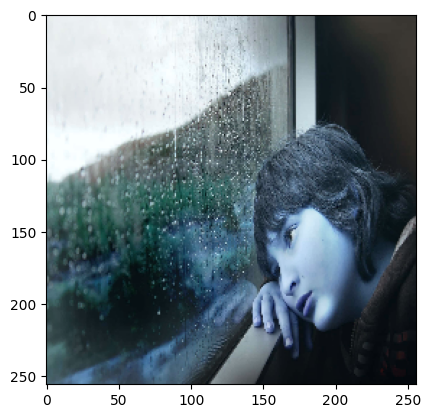

In [63]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [64]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 29ms/step


In [65]:
yhat

array([[0.98875034]], dtype=float32)

In [66]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


# Save the Model

In [67]:
from tensorflow.keras.models import load_model

In [68]:
model.save(os.path.join('models','imageclassifier.h5'))

/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [70]:
new_model = load_model(os.path.join('models','imageclassifier.h5'))

In [71]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 140ms/step


array([[0.98875034]], dtype=float32)